Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
cal_data = pd.read_csv('/content/calories.csv')

In [4]:
cal_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exe_data = pd.read_csv('/content/exercise.csv')

In [6]:
exe_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# Merge on User_Id
df = pd.merge(exe_data, cal_data, on="User_ID")
print(df.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [8]:
df.shape

(15000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [11]:
print("Duplicates before:", df.duplicated().sum())

Duplicates before: 0


In [12]:
print(df.dtypes)


User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


In [13]:
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

Handling Outliers

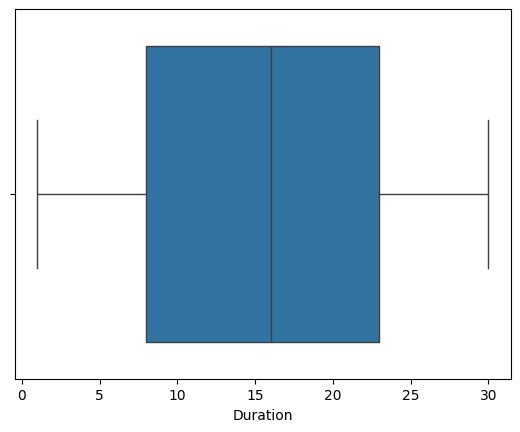

In [14]:
sns.boxplot(x=df['Duration'])
plt.show()

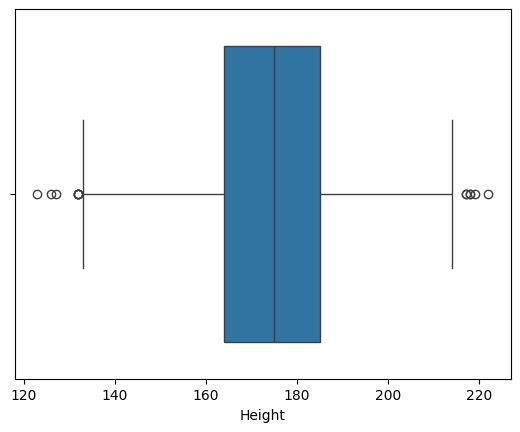

In [15]:
sns.boxplot(x=df['Height'])
plt.show()

In [16]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Height'] >= lower_bound) & (df['Height'] <= upper_bound)]


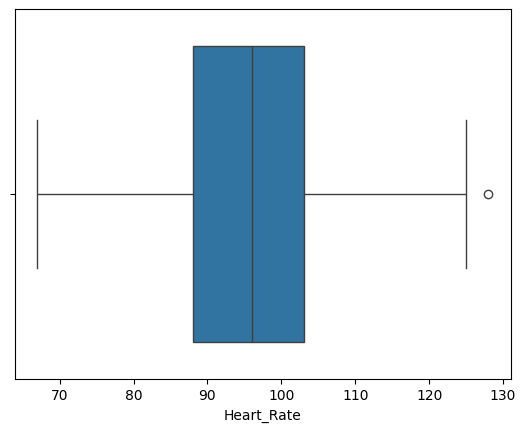

In [17]:
sns.boxplot(x=df['Heart_Rate'])
plt.show()

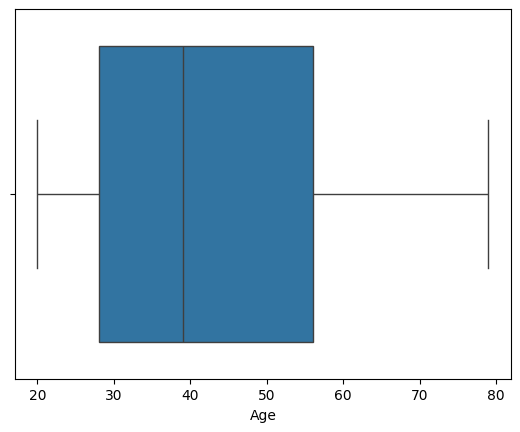

In [18]:
sns.boxplot(x=df['Age'])
plt.show()

Visualization: Feature Distribution & Relationships

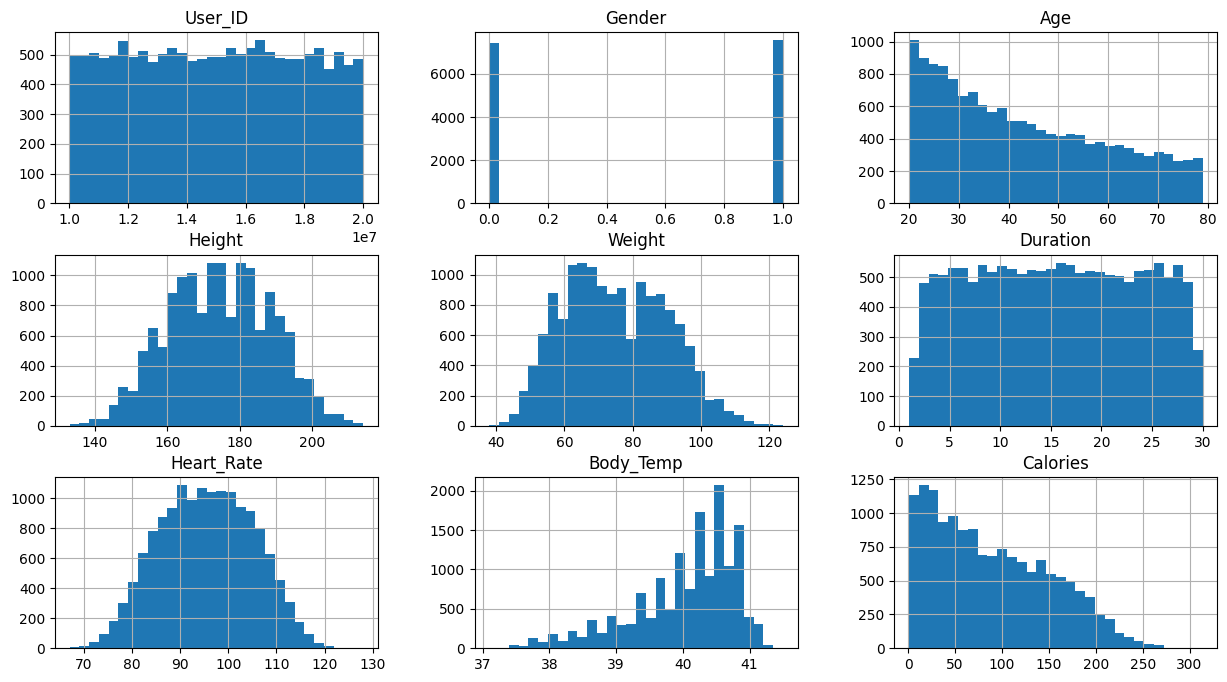

In [19]:
df.hist(bins=30, figsize=(15, 8))
plt.show()


In [20]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

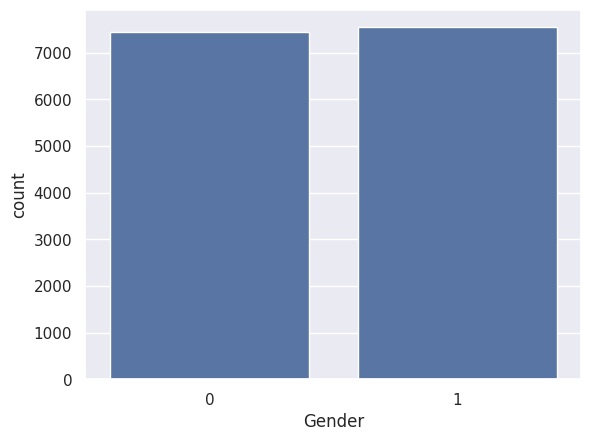

In [21]:
# plotting the gender column in count plot

sns.countplot(x='Gender', data=df)

/tmp/ipython-input-613796707.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

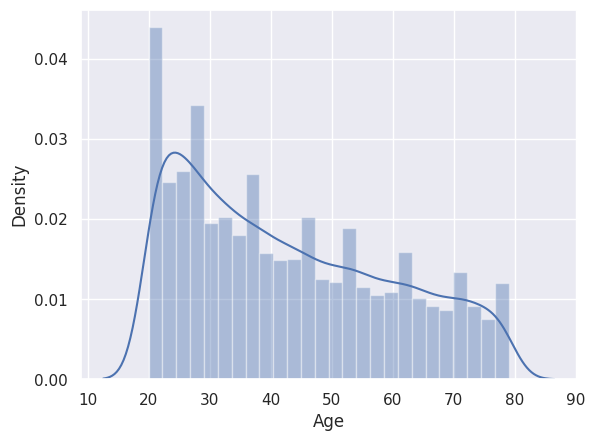

In [22]:
# finiding the distribution of "Age" column

sns.distplot(df['Age'])

/tmp/ipython-input-2562787595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

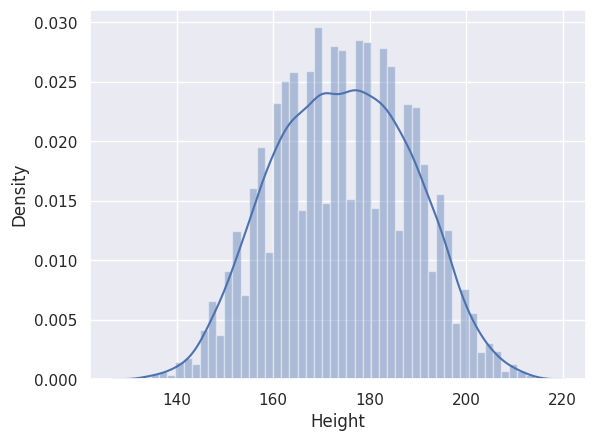

In [23]:
# finiding the distribution of "Height" column

sns.distplot(df['Height'])

/tmp/ipython-input-943386875.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

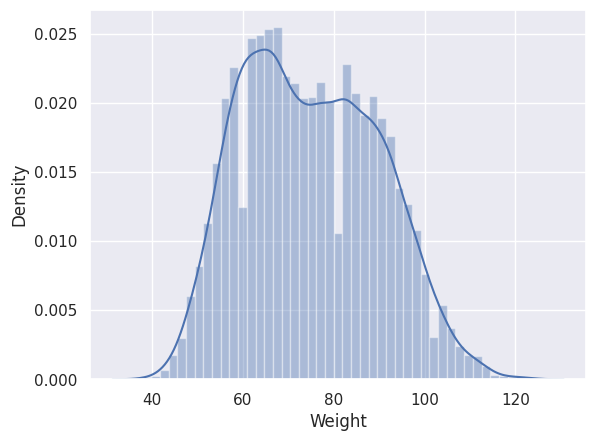

In [24]:
# finiding the distribution of "Weight" column

sns.distplot(df['Weight'])

Checking the Correlation in the dataset

<Axes: >

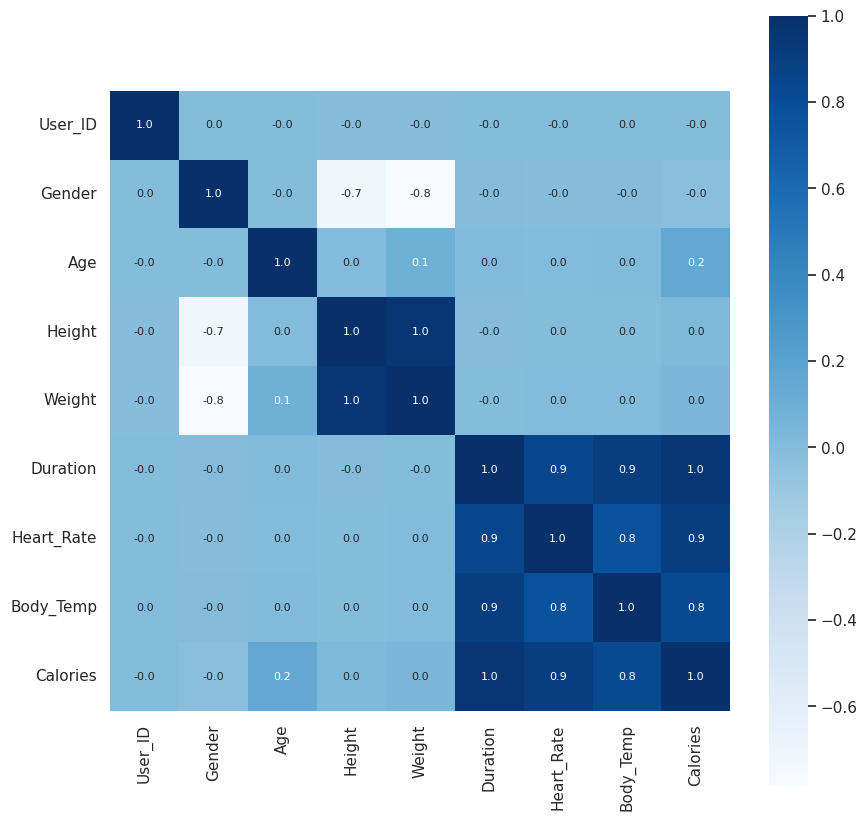

In [25]:

corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [26]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating the Features and Target

In [27]:
# Separate features and target
X = df.drop(columns=['User_ID', 'Calories'], axis=1)
Y = df["Calories"]

In [28]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[14986 rows x 7 columns]


In [29]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 14986, dtype: float64


Splitting the data into training data and test data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(14986, 7) (11988, 7) (2998, 7)


Model Training

1. LinearRegression

In [32]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

In [33]:
print("Linear Regression Train R2:", r2_score(Y_train, lr_train_pred))
print("Linear Regression Test R2:", r2_score(Y_test, lr_test_pred))
mse = mean_squared_error(Y_test, lr_test_pred)
rmse = np.sqrt(mse)

print("Linear Regression RMSE:", rmse)

Linear Regression Train R2: 0.9673621519700125
Linear Regression Test R2: 0.9664682633863858
Linear Regression RMSE: 11.350320913425575


2. Ridge Regression

In [34]:
ridge = Ridge(alpha=1.0)

ridge.fit(X_train, Y_train)

ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

In [35]:
print("Ridge Regression Train R2:", r2_score(Y_train, ridge_train_pred))
print("Ridge Regression Test R2:", r2_score(Y_test, ridge_test_pred))
mse = mean_squared_error(Y_test, ridge_test_pred)
rmse = np.sqrt(mse)

print("Ridge Regression RMSE:", rmse)

Ridge Regression Train R2: 0.9673621469192666
Ridge Regression Test R2: 0.9664690614158523
Ridge Regression RMSE: 11.350185848180663


3. Decision Tree Regressor

In [36]:
dt = DecisionTreeRegressor(random_state=42, max_depth=10)

dt.fit(X_train, Y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [37]:
print("Decision Tree Train R2:", r2_score(Y_train, dt_train_pred))
print("Decision Tree Test R2:", r2_score(Y_test, dt_test_pred))
mse = mean_squared_error(Y_test, dt_test_pred)
rmse = np.sqrt(mse)

print("Decision Tree RMSE:", rmse)

Decision Tree Train R2: 0.9959838319341209
Decision Tree Test R2: 0.991317874124319
Decision Tree RMSE: 5.775547455901746


4. Random forest

In [38]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
rf_train_pred = lr.predict(X_train)
rf_test_pred = lr.predict(X_test)

In [39]:
print("Random Forest Train R2:", r2_score(Y_train, rf_train_pred))
print("Random Forest Test R2:", r2_score(Y_test, rf_test_pred))
mse = mean_squared_error(Y_test, rf_test_pred)
rmse = np.sqrt(mse)

print("Random Forest RMSE:", rmse)

Random Forest Train R2: 0.9673621519700125
Random Forest Test R2: 0.9664682633863858
Random Forest RMSE: 11.350320913425575


3. XGBoost Regressor

In [40]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, Y_train)
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

In [41]:
print("XGBoost Train R2:", r2_score(Y_train, xgb_train_pred))
print("XGBoost Test R2:", r2_score(Y_test, xgb_test_pred))
mse = mean_squared_error(Y_test, xgb_test_pred)
rmse = np.sqrt(mse)
print("XGBoost RMSE:", rmse)

XGBoost Train R2: 0.999588157146862
XGBoost Test R2: 0.9989112677440715
XGBoost RMSE: 2.04522297453424
